In [1]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, load_robot_execution_failures
download_robot_execution_failures()

In [2]:
x, y = load_robot_execution_failures()
x.head()

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0


In [3]:
y.head()

1    True
2    True
3    True
4    True
5    True
dtype: bool

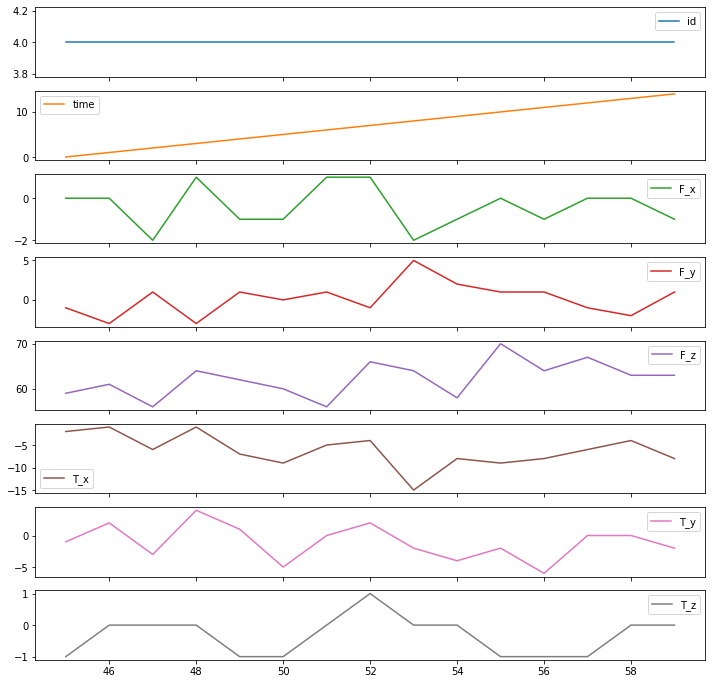

In [4]:
import matplotlib.pyplot as plt

x[x['id'] == 4].plot(subplots=True, sharex=True, figsize=(12,12))
plt.show()

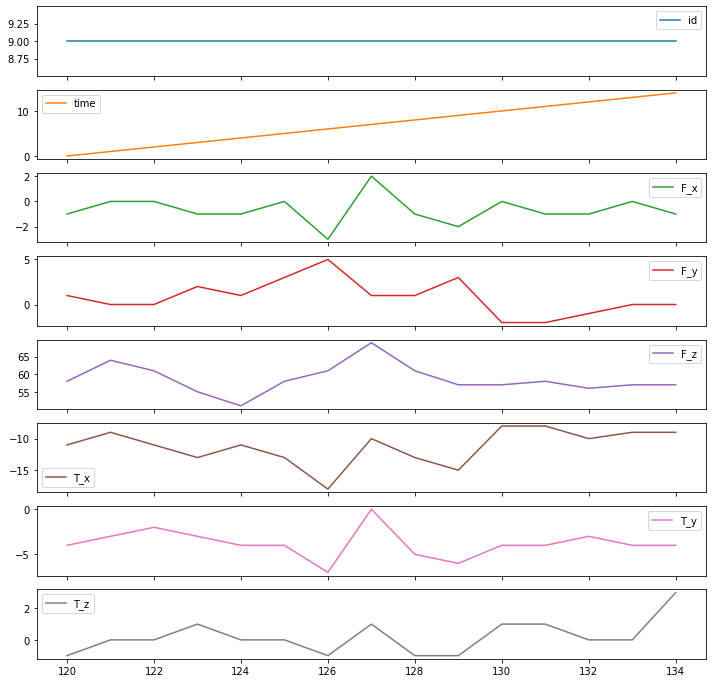

In [5]:
x[x['id'] == 9].plot(subplots=True, sharex=True, figsize=(12,12))
plt.show()

#### Extracting features

In [6]:
from tsfresh import extract_features

features = extract_features(x, column_id='id', column_sort='time')

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 10/10 [00:17<00:00,  1.75s/it]


In [7]:
features

,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,"T_z__matrix_profile__feature_""min""__threshold_0.98","T_z__matrix_profile__feature_""max""__threshold_0.98","T_z__matrix_profile__feature_""mean""__threshold_0.98","T_z__matrix_profile__feature_""median""__threshold_0.98","T_z__matrix_profile__feature_""25""__threshold_0.98","T_z__matrix_profile__feature_""75""__threshold_0.98",T_z__mean_n_absolute_max__number_of_maxima_7
1,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,-0.038462,-1.0,...,-0.000000,-0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2,0.0,1.0,1.0,1.0,-13.0,25.0,1.000000,0.000000,-0.038462,-1.0,...,1.748067,1.831020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.571429
3,0.0,0.0,1.0,1.0,-10.0,12.0,0.714286,0.000000,-0.038462,-1.0,...,2.163956,2.197225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.571429
4,0.0,1.0,1.0,1.0,-6.0,16.0,1.214286,-0.071429,-0.038462,0.0,...,2.302585,2.197225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
5,0.0,0.0,0.0,1.0,-9.0,17.0,0.928571,-0.071429,0.038462,-1.0,...,2.302585,2.197225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,1.0,0.0,1.0,-1073.0,96833.0,7.142857,-5.428571,-0.038462,-98.0,...,2.302585,2.197225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.285714
85,1.0,0.0,1.0,1.0,143.0,1683.0,1.357143,1.071429,0.076923,8.0,...,2.163956,2.197225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.571429
86,1.0,0.0,0.0,0.0,961.0,83497.0,9.071429,9.071429,0.807692,52.0,...,1.227529,1.303092,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.285714
87,1.0,1.0,0.0,1.0,4509.0,1405437.0,12.928571,12.214286,-1.038462,338.0,...,1.497866,1.581094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.285714


In [8]:
# Remove non-value features
from tsfresh.utilities.dataframe_functions import impute

impute(features)

C:\Users\gmnya\anaconda3\lib\site-packages\tsfresh\utilities\dataframe_functions.py:198: RuntimeWarning: The columns ['F_x__partial_autocorrelation__lag_7'
 'F_x__partial_autocorrelation__lag_8'
 'F_x__partial_autocorrelation__lag_9' ...
 'T_z__matrix_profile__feature_"median"__threshold_0.98'
 'T_z__matrix_profile__feature_"25"__threshold_0.98'
 'T_z__matrix_profile__feature_"75"__threshold_0.98'] did not have any finite values. Filling with zeros.
  warnings.warn(


,F_x__variance_larger_than_standard_deviation,F_x__has_duplicate_max,F_x__has_duplicate_min,F_x__has_duplicate,F_x__sum_values,F_x__abs_energy,F_x__mean_abs_change,F_x__mean_change,F_x__mean_second_derivative_central,F_x__median,...,T_z__permutation_entropy__dimension_6__tau_1,T_z__permutation_entropy__dimension_7__tau_1,T_z__query_similarity_count__query_None__threshold_0.0,"T_z__matrix_profile__feature_""min""__threshold_0.98","T_z__matrix_profile__feature_""max""__threshold_0.98","T_z__matrix_profile__feature_""mean""__threshold_0.98","T_z__matrix_profile__feature_""median""__threshold_0.98","T_z__matrix_profile__feature_""25""__threshold_0.98","T_z__matrix_profile__feature_""75""__threshold_0.98",T_z__mean_n_absolute_max__number_of_maxima_7
1,0.0,0.0,1.0,1.0,-14.0,14.0,0.142857,0.000000,-0.038462,-1.0,...,-0.000000,-0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,1.0,1.0,1.0,-13.0,25.0,1.000000,0.000000,-0.038462,-1.0,...,1.748067,1.831020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.571429
3,0.0,0.0,1.0,1.0,-10.0,12.0,0.714286,0.000000,-0.038462,-1.0,...,2.163956,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.571429
4,0.0,1.0,1.0,1.0,-6.0,16.0,1.214286,-0.071429,-0.038462,0.0,...,2.302585,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
5,0.0,0.0,0.0,1.0,-9.0,17.0,0.928571,-0.071429,0.038462,-1.0,...,2.302585,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1.0,1.0,0.0,1.0,-1073.0,96833.0,7.142857,-5.428571,-0.038462,-98.0,...,2.302585,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.285714
85,1.0,0.0,1.0,1.0,143.0,1683.0,1.357143,1.071429,0.076923,8.0,...,2.163956,2.197225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.571429
86,1.0,0.0,0.0,0.0,961.0,83497.0,9.071429,9.071429,0.807692,52.0,...,1.227529,1.303092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.285714
87,1.0,1.0,0.0,1.0,4509.0,1405437.0,12.928571,12.214286,-1.038462,338.0,...,1.497866,1.581094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.285714


In [9]:
# Select relevant features
from tsfresh import select_features

filtered_features = select_features(features, y)
filtered_features

,F_x__value_count__value_-1,F_x__abs_energy,F_x__root_mean_square,T_y__absolute_maximum,F_x__mean_n_absolute_max__number_of_maxima_7,F_x__range_count__max_1__min_-1,F_y__abs_energy,F_y__root_mean_square,F_y__mean_n_absolute_max__number_of_maxima_7,T_y__variance,...,"F_y__cwt_coefficients__coeff_13__w_2__widths_(2, 5, 10, 20)","F_y__cwt_coefficients__coeff_14__w_5__widths_(2, 5, 10, 20)",T_y__lempel_ziv_complexity__bins_3,T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2,F_y__quantile__q_0.7,"T_x__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0",T_z__large_standard_deviation__r_0.35000000000000003,T_z__quantile__q_0.9
1,14.0,14.0,0.966092,1.0,1.000000,15.0,13.0,0.930949,1.000000,0.222222,...,-0.310265,-0.751682,0.400000,-1.0,-5.960000e+02,-1.0,-1.0,0.000000,0.0,0.0
2,7.0,25.0,1.290994,5.0,1.571429,13.0,76.0,2.250926,3.000000,4.222222,...,-0.202951,0.057818,0.533333,-3.6,-6.803846e+02,-1.0,-1.0,0.000000,1.0,0.0
3,11.0,12.0,0.894427,5.0,1.000000,14.0,40.0,1.632993,2.142857,3.128889,...,0.539121,0.912474,0.533333,-4.0,-6.170000e+02,-1.0,0.0,0.000000,1.0,0.0
4,5.0,16.0,1.032796,6.0,1.285714,10.0,60.0,2.000000,2.428571,7.128889,...,-2.641390,-0.609735,0.533333,-4.6,3.426308e+03,-1.0,1.0,0.000000,0.0,0.0
5,9.0,17.0,1.064581,5.0,1.285714,13.0,46.0,1.751190,2.285714,4.160000,...,0.591927,0.072771,0.466667,-5.0,-2.609000e+03,-1.0,0.8,0.000000,0.0,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.0,96833.0,80.346334,167.0,105.285714,0.0,42780.0,53.404120,71.428571,1563.528889,...,38.559593,71.641254,0.533333,36.4,-7.700628e+07,-105.0,66.8,64.000000,0.0,-1.4
85,0.0,1683.0,10.592450,14.0,13.714286,0.0,1523.0,10.076375,12.142857,14.755556,...,14.429645,16.349699,0.466667,1.0,-1.050785e+04,5.8,10.6,13.555556,0.0,-1.4
86,0.0,83497.0,74.608757,191.0,98.142857,0.0,21064.0,37.473546,47.714286,2788.595556,...,60.760842,71.095480,0.466667,19.6,-5.544922e+06,30.4,38.4,0.250000,0.0,2.8
87,0.0,1405437.0,306.097697,471.0,340.000000,0.0,308658.0,143.447551,157.285714,6415.715556,...,109.029954,173.699573,0.466667,272.6,-9.881845e+07,246.8,154.8,0.000000,0.0,43.2


#### Comparison

We campare sklearn model using data with all features and data with selected features

In [10]:
from sklearn.model_selection import train_test_split

X_feature_train, X_feature_test, y_train, y_test = train_test_split(features, y, test_size=.4)
X_filtered_train, X_filtered_test = X_feature_train[filtered_features.columns], X_feature_test[filtered_features.columns]

In [11]:
# Using data with all features
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

classifier_feature = DecisionTreeClassifier()
classifier_feature.fit(X_feature_train, y_train)

print(classification_report(y_test, classifier_feature.predict(X_feature_test)))

              precision    recall  f1-score   support

       False       0.96      0.96      0.96        28
        True       0.88      0.88      0.88         8

    accuracy                           0.94        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.94      0.94      0.94        36



In [12]:
# Using data with filtered features
classifier_filtered = DecisionTreeClassifier()
classifier_filtered.fit(X_filtered_train, y_train)

print(classification_report(y_test, classifier_filtered.predict(X_filtered_test)))

              precision    recall  f1-score   support

       False       0.96      0.96      0.96        28
        True       0.88      0.88      0.88         8

    accuracy                           0.94        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.94      0.94      0.94        36

